Grid World Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the Grid World environment
class GridWorld:
    def __init__(self, size=4, start=(0, 0), goal=(3, 3), obstacles=[]):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.obstacles = obstacles
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)

        if (x, y) in self.obstacles:
            x, y = self.state  # hit obstacle, stay in same place

        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # reward 10 for reaching goal
        else:
            return self.state, -1, False  # penalty of -1 otherwise


Q-Learning Algorithm

In [2]:
def q_learning(env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
    q_table = np.zeros((env.size, env.size, len(env.actions)))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            x, y = state
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, 3)  # explore
            else:
                action_index = np.argmax(q_table[x, y])  # exploit

            action = env.actions[action_index]
            next_state, reward, done = env.step(action)
            nx, ny = next_state

            # Q-Learning update rule
            q_table[x, y, action_index] += alpha * (
                reward + gamma * np.max(q_table[nx, ny]) - q_table[x, y, action_index]
            )
            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return q_table, rewards


Initial and Final Q-tables

In [3]:
# Initialize environment
env = GridWorld()

# Initial Q-table (all zeros)
print("Initial Q-table:")
print(np.zeros((env.size, env.size, len(env.actions))))

# Train Q-Learning
final_q_table, _ = q_learning(env)

# Final Q-table
print("\nFinal Q-table:")
np.set_printoptions(precision=2, suppress=True)
print(final_q_table)


Initial Q-table:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]

Final Q-table:
[[[-0.66  1.81 -0.71  0.49]
  [-1.34  2.94 -1.2  -1.39]
  [-0.86 -0.01 -0.81 -0.79]
  [-0.39 -0.17 -0.55 -0.39]]

 [[-0.87 -0.09  0.55  3.12]
  [ 0.59  4.58  0.64  0.44]
  [-0.61 -0.16 -0.44  4.62]
  [-0.2   7.51 -0.1  -0.24]]

 [[-0.54 -0.74 -0.77  3.49]
  [ 2.24  3.59  0.23  6.2 ]
  [ 1.27  8.    3.82  6.15]
  [ 0.63  9.97  0.    1.46]]

 [[-0.42 -0.39 -0.39  0.12]
  [ 0.28  0.82 -0.32  7.58]
  [ 3.97  4.85  3.37 10.  ]
  [ 0.    0.    0.    0.  ]]]


Learning Curve for Different Hyperparameters

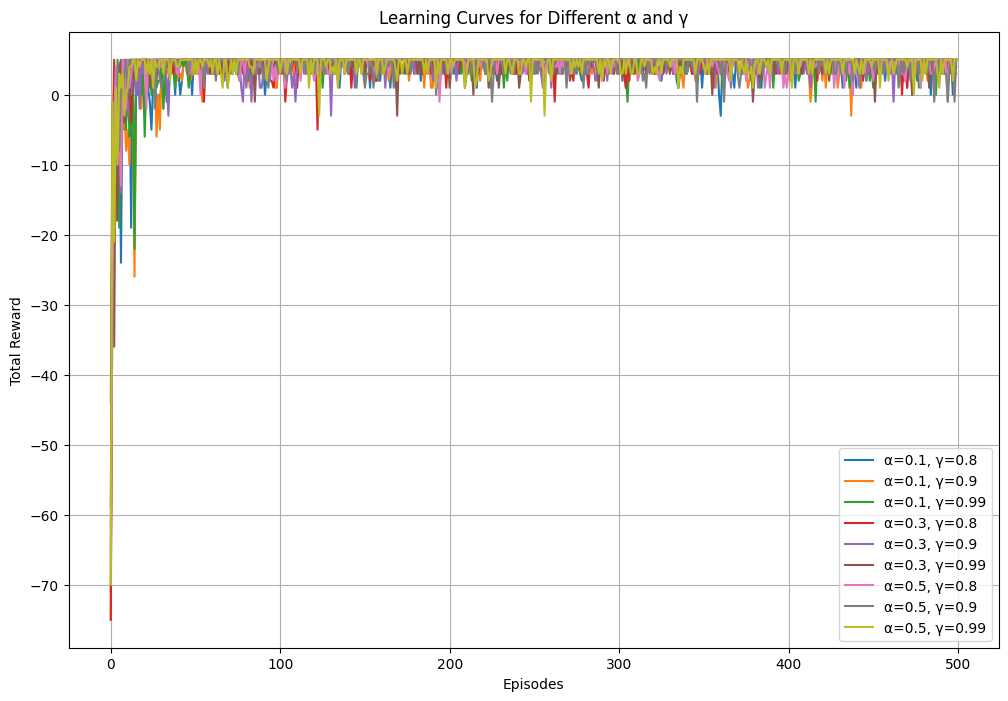

In [4]:
alphas = [0.1, 0.3, 0.5]
gammas = [0.8, 0.9, 0.99]
episodes = 500

plt.figure(figsize=(12, 8))

for alpha in alphas:
    for gamma in gammas:
        _, rewards = q_learning(env, alpha=alpha, gamma=gamma)
        plt.plot(rewards, label=f'α={alpha}, γ={gamma}')

plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Learning Curves for Different α and γ')
plt.legend()
plt.grid(True)
plt.show()


#Conclusion

n this experiment, the Q-Learning algorithm was successfully implemented in a Grid World environment to observe its learning behavior under varying hyperparameters. The learning curves plotted for different values of the learning rate (α) and discount factor (γ) clearly demonstrate how these parameters influence the convergence speed and overall performance of the agent. It was observed that higher learning rates, such as 0.3 and 0.5, generally led to faster convergence, while a higher discount factor (close to 1) ensured better long-term reward estimation. Despite some initial fluctuations in reward, all combinations eventually stabilized, indicating that the agent was able to learn an optimal or near-optimal policy over time. This experiment highlights the effectiveness of Q-Learning as an off-policy method and emphasizes the importance of careful tuning of α and γ to achieve optimal learning performance in reinforcement learning tasks.